

# Pandas for Exploratory Data Analysis

---
<br>

<center><img src="https://www.telegraph.co.uk/content/dam/news/2016/08/23/106598324PandawaveNEWS_trans_NvBQzQNjv4Bqeo_i_u9APj8RuoebjoAHt0k9u7HhRJvuo-ZLenGRumA.jpg?imwidth=600"></center>

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## 1. What Is Pandas?

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

Behind the scenes, these datatypes use the NumPy ("Numerical Python") library.

NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
 - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
 - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
 - The total size of an `ndarray` is fixed.

Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes.

Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### 1.1 Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries.

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error.

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.

### 1.2 Viewing Documentation

There are a few ways to find more information about a method.

In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
```
help(users.head)
```

### 1.3 Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

In [1]:
# Load Pandas into Python
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('./data/user.tbl', sep='|')
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
type(users)             # Check the type of users

pandas.core.frame.DataFrame

In [4]:
 # The row index (aka "the row labels" — in this case integers)
users.index

RangeIndex(start=0, stop=943, step=1)

In [5]:
# Column names (which is an index)
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [6]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [7]:
# Number of rows and columns
users.shape

(943, 5)

In [8]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [9]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


### 1.4 Selecting columns and rows

Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  

In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [10]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [11]:
users['gender'][:10]

0    M
1    F
2    M
3    M
4    F
5    M
6    M
7    M
8    M
9    M
Name: gender, dtype: object

In [12]:
# DataFrame columns are Pandas Series.
type(users['gender'])

pandas.core.series.Series

In [13]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender'].shape

(943,)

In [14]:
type(users[['gender']])

pandas.core.frame.DataFrame

In [15]:
users[['gender']].shape

(943, 1)

In [16]:
# Select one column using the DataFrame attribute.
users.gender[:10]

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0    M
1    F
2    M
3    M
4    F
5    M
6    M
7    M
8    M
9    M
Name: gender, dtype: object

When selecting columns and rows from our dataframe we should get used to using the `.loc` operator. This takes two arguments, the first is the rows we want and the second is the columns we want to select.

We can use a colon to specify we want all columns or rows, the following will return the whole dataframe:
`df.loc[:, :]`

In [17]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [18]:
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [21]:
users.groupby('age').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [22]:
users.value_counts()

user_id  age  gender  occupation  zip_code
1        24   M       technician  85711       1
634      39   M       engineer    T8H1N       1
622      25   M       programmer  14850       1
623      50   F       educator    60187       1
624      19   M       student     30067       1
                                             ..
319      38   M       programmer  22030       1
320      19   M       student     24060       1
321      49   F       educator    55413       1
322      20   M       student     50613       1
943      22   M       student     77841       1
Name: count, Length: 943, dtype: int64

In [23]:
users.loc[:,:].shape

(943, 5)

In [25]:
users.iloc[:,::3]

,user_id,occupation
0,1,technician
1,2,other
2,3,writer
3,4,technician
4,5,other
...,...,...
938,939,student
939,940,administrator
940,941,student
941,942,librarian


In [26]:
users.loc[:5, :] #unlike Python ranges, Pandas index ranges INCLUDE the final value in the range.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101


In [27]:
users.loc[0:2, ['gender', 'age']]

,gender,age
0,M,24
1,F,53
2,M,23


In [28]:
users.loc[0:2, 'gender' :] #we can use ranges on columns too

,gender,occupation,zip_code
0,M,technician,85711
1,F,other,94043
2,M,writer,32067


You can use `.iloc` to filter rows and columns based on integer position.

Rows and columns use indicies, so `.iloc` lets you refer to indicies via their index rather than value.

**NOTE:** as this is an *integer range* not a *pandas range* it will not include the final value!

In [29]:
users.iloc[0:5, [0, 3]]

,user_id,occupation
0,1,technician
1,2,other
2,3,writer
3,4,technician
4,5,other


### 1.5 Summarizing the data

Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [30]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [31]:
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [32]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [33]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

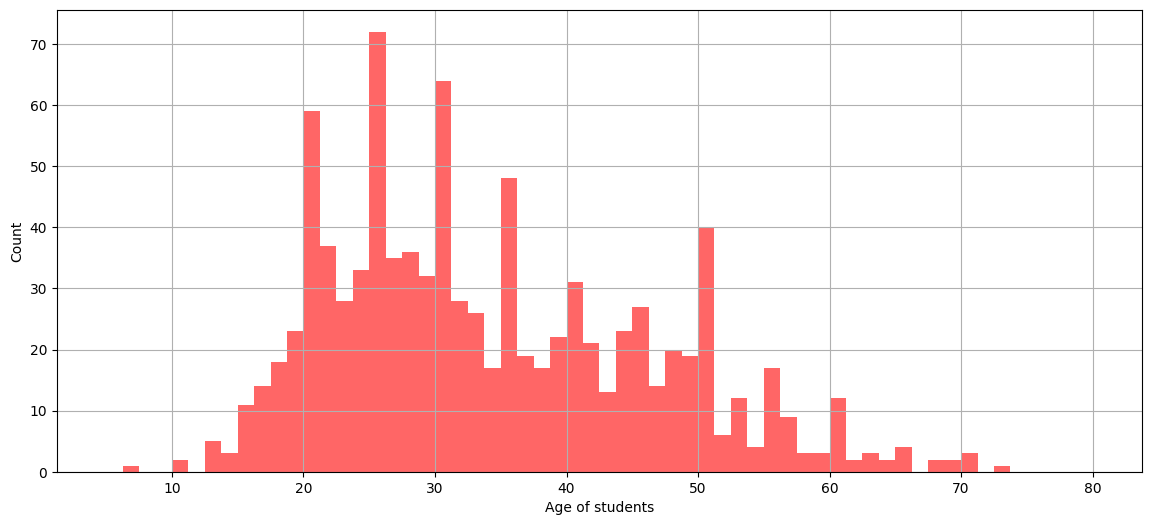

In [34]:
# A histogram of a column (the distribution of ages).
users.age.hist(bins=60,range=[5, 80],figsize=(14,6),color='red',alpha=0.6);
plt.xlabel('Age of students');
plt.ylabel('Count');

In [35]:
#Count the number of occurrences of each value
users.gender.value_counts()     # Most useful for categorical variables

gender
M    670
F    273
Name: count, dtype: int64

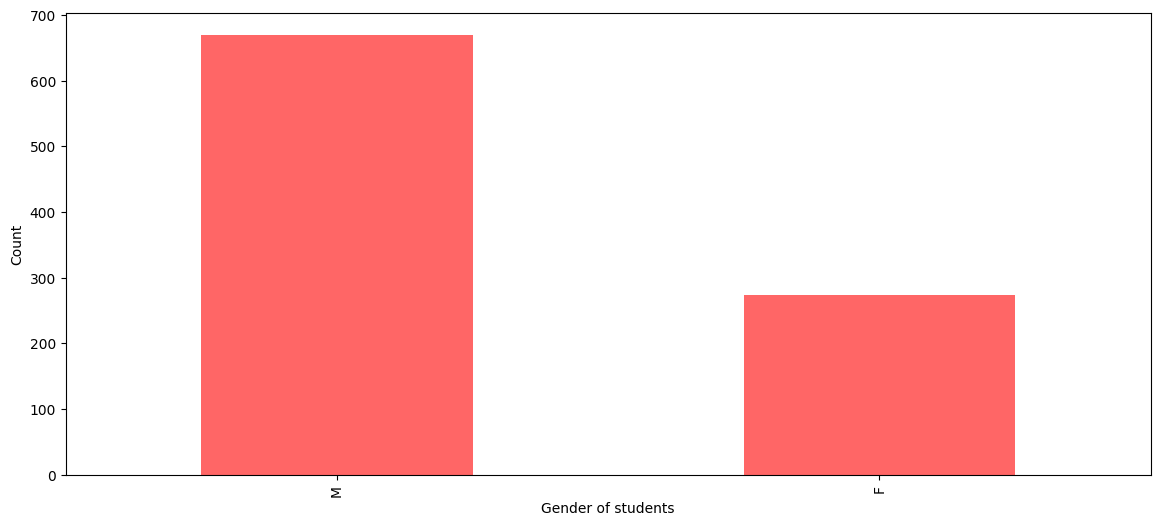

In [36]:
users.gender.value_counts().plot(kind='bar',figsize=(14,6),color='red',alpha=0.6);
plt.xlabel('Gender of students');
plt.ylabel('Count');

## Exercise 1

In [37]:
# Read drinks.csv into a DataFrame called "drinks".
drinks = pd.read_csv('data/drinks.csv')

In [38]:
# Print the head and the tail.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [39]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [40]:
# Examine the default index, datatypes, and shape.
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [41]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [42]:
drinks.shape

(193, 6)

In [43]:
# Print the beer_servings Series.
drinks.beer_servings.head()

0      0
1     89
2     25
3    245
4    217
Name: beer_servings, dtype: int64

In [44]:
# Calculate the average (mean) beer_servings for the entire data set.
drinks.beer_servings.mean()

106.16062176165804

In [45]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks.continent.value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

### 1.6 Filtering and Sorting

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

In [46]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.

m_age_below_20 = users['age'] < 20
m_age_below_20.head()

0    False
1    False
2    False
3    False
4    False
Name: age, dtype: bool

In [47]:
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users.loc[m_age_below_20, :].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [48]:
m_students = users.occupation == 'student'

student_frame = users.loc[m_students, :]

**Important:** This creates a view of the original DataFrame, not a new DataFrame.

If you alter this view (e.g., by storing it in a variable and altering that) you will alter only the slice of the DataFrame and not the actual DataFrame itself.

Notice that Pandas gives you a `SettingWithCopyWarning` to alert you of this.

In [49]:
student_frame['new col'] = 12

/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_18628/1246671229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_frame['new col'] = 12


In [50]:
# we should make a copy of the dataframe when we do this so that we don't reference the original dataframe anymore
student_frame = users.loc[m_students, :].copy()

In [51]:
# It is best practice to use .loc and .iloc instead
student_frame.loc[:,'new_col'] = 12

In [52]:
# Select the new column from the filtered results.
student_frame.iloc[:5, 5]

8     12
29    12
31    12
32    12
35    12
Name: new_col, dtype: int64

#### Logical filtering with multiple conditions

* Ampersand (`&`) for `AND` condition.
* Pipe (`|`) for `OR` condition.

It is important to put parentheses around each expression because `&` and `|` have higher precedence than `<` or `==`

In [53]:
mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU')
drinks.loc[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU


In [54]:
mask = (drinks.beer_servings > 25) & ((drinks.continent == 'EU') | (drinks.continent == 'SA'))
drinks.loc[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
6,Argentina,193,25,221,8.3,SA
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU


In [55]:
#preferred alternative to multiple OR conditions:

mask = (drinks.beer_servings > 25) & drinks.continent.isin(['EU', 'SA'])
drinks.loc[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
6,Argentina,193,25,221,8.3,SA
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU


#### Sorting

In [56]:
users.age.sort_values().head()

29      7
470    10
288    11
879    13
608    13
Name: age, dtype: int64

In [57]:
users.age.sort_values(inplace = True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [59]:
users.sort_values('age', inplace = True)

In [60]:
# Use descending order instead.
users.sort_values('age', ascending=False).head()

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
802,803,70,M,administrator,78212
558,559,69,M,executive,10022


In [61]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'], ascending = [True, False]).head()

,user_id,age,gender,occupation,zip_code
802,803,70,M,administrator,78212
265,266,62,F,administrator,78756
818,819,59,M,administrator,40205
130,131,59,F,administrator,15237
6,7,57,M,administrator,91344


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [62]:
# Filter DataFrame to only include European countries.
drinks.loc[drinks.continent == 'EU', :][:10]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [63]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks.loc[(drinks.continent == 'EU') & (drinks.wine_servings > 300), :]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [64]:
# Calculate the average beer_servings for all of Europe.
drinks.loc[(drinks.continent == 'EU'), 'beer_servings'].mean()

193.77777777777777

In [65]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
drinks.sort_values('total_litres_of_pure_alcohol', ascending=False)[['country', 'total_litres_of_pure_alcohol']].head(10)

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
81,Ireland,11.4
155,Slovakia,11.4
99,Luxembourg,11.4


### 1.7 Renaming, Adding, and Removing Columns

In [66]:
# Print the column labels
print(drinks.columns)

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')


In [67]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [68]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

In [69]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [70]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

#### Easy Column Operations

Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [71]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


#### Removing Columns

In [72]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [73]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

### 1.8 Handling Missing Values

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

- **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [74]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [75]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

continent
AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: count, dtype: int64

In [76]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

23

In [77]:
# True if not missing, False if missing
drinks.continent.notnull().sum()

170

In [78]:
# Only show rows where continent is not missing.
drinks.loc[drinks.continent.notnull(), :].head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


#### Dropping missing values

In [79]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [80]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


#### Filling Missing Values

You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [81]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [82]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols, na_filter=False)

In [83]:
drinks.continent.value_counts()

continent
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: count, dtype: int64

In [84]:
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
dtype: int64

### 1.8 Understanding Pandas Axes

In [85]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country      AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                     20489
spirit                                                   15632
wine                                                      9544
liters                                                   910.4
continent    ASEUAFEUAFNASAEUOCEUEUNAASASNAEUEUNAAFASSAEUAF...
dtype: object

In [86]:
# axis=0 is the default.
drinks.sum()

country      AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                     20489
spirit                                                   15632
wine                                                      9544
liters                                                   910.4
continent    ASEUAFEUAFNASAEUOCEUEUNAASASNAEUEUNAAFASSAEUAF...
dtype: object

In [87]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks['wine_liters'] = drinks[['wine', 'liters']].sum(axis=1)
drinks.head()

,country,beer,spirit,wine,liters,continent,wine_liters
0,Afghanistan,0,0,0,0.0,AS,0.0
1,Albania,89,132,54,4.9,EU,58.9
2,Algeria,25,0,14,0.7,AF,14.7
3,Andorra,245,138,312,12.4,EU,324.4
4,Angola,217,57,45,5.9,AF,50.9


<a id="exercise-three"></a>
### Exercise 3

In [88]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [89]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [90]:
# Check the shape of the DataFrame.
ufo.shape

(80543, 5)

In [91]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts().head(3)

Colors Reported
ORANGE    5216
RED       4809
GREEN     1897
Name: count, dtype: int64

In [92]:
# Rename any columns with spaces so that they don't contain spaces.
ufo.columns = [c.replace(" ", "_") for c in ufo.columns]
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [93]:
# For reports in VA, what's the most common city?
ufo.loc[ufo.State == 'VA', 'City'].value_counts().head(1)

City
Virginia Beach    110
Name: count, dtype: int64

In [94]:
# Print a DataFrame containing only reports from Arlington, VA.
ufo.loc[(ufo.State == 'VA') & (ufo.City == 'Arlington'), :]

,City,Colors_Reported,Shape_Reported,State,Time
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
6300,Arlington,NaN,CHEVRON,VA,5/5/1990 21:40
10278,Arlington,NaN,DISK,VA,5/27/1997 15:30
14527,Arlington,NaN,OTHER,VA,9/10/1999 21:41
17984,Arlington,RED,DISK,VA,11/19/2000 22:00
21201,Arlington,GREEN,FIREBALL,VA,1/7/2002 17:45
22633,Arlington,NaN,LIGHT,VA,7/26/2002 1:15
22780,Arlington,NaN,LIGHT,VA,8/7/2002 21:00
25066,Arlington,NaN,CIGAR,VA,6/1/2003 22:34
27398,Arlington,NaN,VARIOUS,VA,12/13/2003 2:00


In [95]:
# Count the number of missing values in each column.
ufo.isna().sum()

City                  51
Colors_Reported    63509
Shape_Reported      8402
State                  0
Time                   0
dtype: int64

In [96]:
# How many rows remain if you drop all rows with any missing values?
ufo.dropna().shape

(15509, 5)

### 1.9 Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [97]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [114]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [99]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [100]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
AF,53,61.471698,0,376
AS,44,37.045455,0,247
EU,45,193.777778,0,361
NA,23,145.434783,1,285
OC,16,89.687500,0,306
SA,12,175.083333,93,333


In [101]:
# For each continent, count the number of rows.
print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64
continent
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: count, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following using the `groupby` method

In [102]:
users.head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106


In [103]:
# For each occupation in "users", count the number of occurrences.
users.groupby('occupation')['user_id'].count().sort_values()

occupation
doctor             7
homemaker          7
none               9
salesman          12
lawyer            12
retired           14
healthcare        16
entertainment     18
marketing         26
technician        27
artist            28
scientist         31
executive         32
writer            45
librarian         51
programmer        66
engineer          67
administrator     79
educator          95
other            105
student          196
Name: user_id, dtype: int64

In [104]:
# For each occupation, calculate the mean age.
users.groupby('occupation')['age'].mean().sort_values()

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
programmer       33.121212
technician       33.148148
other            34.523810
scientist        35.548387
salesman         35.666667
writer           36.311111
engineer         36.388060
lawyer           36.750000
marketing        37.615385
executive        38.718750
administrator    38.746835
librarian        40.000000
healthcare       41.562500
educator         42.010526
doctor           43.571429
retired          63.071429
Name: age, dtype: float64

In [105]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [106]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender'])['age'].mean().unstack()

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


### 1.10 Merging `DataFrames`

In [107]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_csv(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [108]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_csv(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [109]:
print(ratings.shape)
print(movies.shape)

(100000, 4)
(1682, 2)


In [110]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = movies.merge(ratings, how='inner', on='movie_id', validate='1:m')
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [111]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)